**INTRODUCTION**

This file contains synthetic data for weather type classification, which includes various meteorological features such as temperature, humidity, wind
speed, precipitation percentage, cloud cover, atmospheric pressure, UV index,
season, visibility, and location. These features capture key elements of weather conditions and are essential for accurately classifying different weather types, such as sunny, rainy, cloudy, or snowy.

The dataset is ideal for practicing classification algorithms, providing an excellent opportunity to explore machine learning models and techniques for predicting weather patterns. By analyzing this data, users can gain insights into how various weather factors influence the classification of weather types, making it a valuable resource for both beginners and experienced data scientists interested in weather prediction.

**AIM**

The aim of this dataset is to provide synthetic weather data for weather type classification. It includes key features like temperature, humidity, wind speed, and cloud cover, among others, to help users practice and apply classification algorithms. The dataset is ideal for exploring how different weather factors influence weather patterns and for building predictive models to classify weather conditions.

**OBJECTIVES**
    

**1.   ractice Classification Algorithms:** To provide users with a synthetic  dataset that allows them to apply and experiment with various classification algorithms, such as decision trees, random forests, and support vector machines, for predicting weather types.

**2.** **Understand Weather Pattern Dynamics:** To enable exploration of how different meteorological features (e.g., temperature, humidity, wind speed) influence weather conditions, and to help users identify patterns or correlations between these features and weather types.

**3.**  **Enhance Predictive Modeling Skills:** To support users in refining their skills in data preprocessing, feature selection, model training, and performance evaluation, specifically in the context of weather prediction tasks.

**4.  Simulate Weather Conditions:** To generate a realistic, synthetic representation of weather data, helping users practice weather prediction techniques across a variety of locations, seasons, and atmospheric conditions.

**5. Support Learning and Research:** To serve as a valuable resource for students, data scientists, and researchers in developing machine learning models for weather forecasting and improving their understanding of meteorological data and its role in predictive analytics.











**DATA ANALYSIS**

1 **Exploratory Data Analysis (EDA)**

  EDA helps to understand the distribution and relationships among the variables.


  *  Data Cleaning: Identifying and handling any missing or inconsistent values

**2**. **Feature Importance**

  Feature selection techniques, such as decision trees or random forests, can be used to assess
  which input features contribute the most to predicting weather type. Visualizing feature
  importance helps to understand the signicance of each variable.

**3. Visualizing Feature Relationships**

*  Count Plot: This is used to display the distribution of the weather type, helping to visualize how frequently each season appears in the dataset.



In [1]:
import pandas as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df=np.read_csv("/content/weather_classification_data (1).csv")
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
2994,-1,94,8.5,52,overcast,985.86,1,Winter,1.0,mountain,Snowy
2995,21,91,12.5,81,partly cloudy,1000.03,3,Spring,2.0,coastal,Rainy
2996,30,67,1.0,43,partly cloudy,1007.76,1,Autumn,8.5,mountain,Cloudy
2997,34,42,2.0,3,partly cloudy,1024.53,11,Summer,10.0,coastal,Sunny


In [3]:
df["Weather Type"].value_counts()

,count
Weather Type,
Cloudy,783
Snowy,761
Rainy,740
Sunny,715


<ipython-input-4-5b5efc68bd8d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Season",data=df,palette="rocket")


<Axes: xlabel='Season', ylabel='count'>

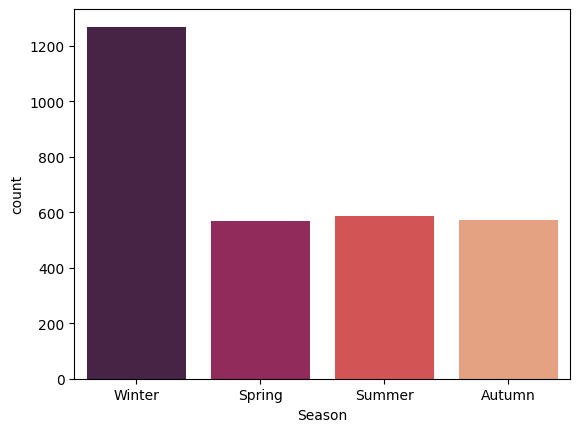

In [4]:
sns.countplot(x="Season",data=df,palette="rocket")

In [5]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [6]:
df.dtypes

,0
Temperature,int64
Humidity,int64
Wind Speed,float64
Precipitation (%),int64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


In [7]:
df.drop(["Location"],axis=1,inplace=True)
df.head(3)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,Sunny


In [8]:
df["Cloud Cover"].value_counts()

,count
Cloud Cover,
overcast,1402
partly cloudy,1049
clear,464
cloudy,84


In [9]:

le=LabelEncoder()
df["Cloud Cover"]=le.fit_transform(df["Cloud Cover"])
df["Season"]=le.fit_transform(df["Season"])
df["Weather Type"]=le.fit_transform(df["Weather Type"])
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Weather Type
0,14,73,9.5,82,3,1010.82,2,3,3.5,1
1,39,96,8.5,71,3,1011.43,7,1,10.0,0
2,30,64,7.0,16,0,1018.72,5,1,5.5,3
3,38,83,1.5,82,0,1026.25,7,1,1.0,3
4,27,74,17.0,66,2,990.67,1,3,2.5,1


In [10]:
X=df.iloc[:,:-1]
X

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km)
0,14,73,9.5,82,3,1010.82,2,3,3.5
1,39,96,8.5,71,3,1011.43,7,1,10.0
2,30,64,7.0,16,0,1018.72,5,1,5.5
3,38,83,1.5,82,0,1026.25,7,1,1.0
4,27,74,17.0,66,2,990.67,1,3,2.5
...,...,...,...,...,...,...,...,...,...
2994,-1,94,8.5,52,2,985.86,1,3,1.0
2995,21,91,12.5,81,3,1000.03,3,1,2.0
2996,30,67,1.0,43,3,1007.76,1,0,8.5
2997,34,42,2.0,3,3,1024.53,11,2,10.0


In [11]:
y=df.iloc[:,-1]
y

,Weather Type
0,1
1,0
2,3
3,3
4,1
...,...
2994,2
2995,1
2996,0
2997,3


In [12]:
y.value_counts()

,count
Weather Type,
0,783
2,761
1,740
3,715


In [13]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.29007634, 0.59550562, 0.20212766, ..., 0.14285714, 1.        ,
        0.175     ],
       [0.48091603, 0.85393258, 0.18085106, ..., 0.5       , 0.33333333,
        0.5       ],
       [0.41221374, 0.49438202, 0.14893617, ..., 0.35714286, 0.33333333,
        0.275     ],
       ...,
       [0.41221374, 0.52808989, 0.0212766 , ..., 0.07142857, 0.        ,
        0.425     ],
       [0.44274809, 0.24719101, 0.04255319, ..., 0.78571429, 0.66666667,
        0.5       ],
       [0.19847328, 0.80898876, 0.35106383, ..., 0.07142857, 1.        ,
        0.075     ]])

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=1,test_size=0.3)

In [15]:
knn=KNeighborsClassifier()
sv=SVC(probability=True)
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
lst=[knn,rf,sv,gb]
for i in lst:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_pred,y_test))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       247
           1       0.83      0.87      0.85       197
           2       0.93      0.93      0.93       245
           3       0.90      0.94      0.92       211

    accuracy                           0.88       900
   macro avg       0.88      0.89      0.88       900
weighted avg       0.88      0.88      0.88       900

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       217
           1       0.93      0.91      0.92       214
           2       0.94      0.92      0.93       253
           3       0.93      0.95      0.94       216

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900

SVC(probability=True)
              precision    recall  f1-score   support

     

In [16]:
#gb=GradientBoostingClassifier()
#parameters={"random_state":[1,2,3,4],
#           "n_estimators":[100,150,200],
#            "min_samples_leaf":[1,2,3,4]}
#clf=GridSearchCV(gb,parameters,cv=10,scoring="accuracy")
#clf.fit(X_train,y_train)

In [17]:
#rint(clf.best_params_)

In [18]:
gb=GradientBoostingClassifier(random_state=2,n_estimators=150,min_samples_leaf=3)
gb.fit(X_train,y_train)

GradientBoostingClassifier(min_samples_leaf=3, n_estimators=150, random_state=2)

In [19]:
joblib.dump(gb,"model.project")

['model.project']

In [20]:
y_pred=gb.predict(X_test)
y_pred

array([0, 2, 0, 0, 2, 0, 3, 1, 3, 0, 2, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2,
       3, 0, 1, 3, 3, 1, 0, 0, 3, 0, 2, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 1,
       1, 2, 0, 0, 2, 0, 3, 1, 1, 3, 0, 2, 1, 3, 0, 3, 2, 1, 3, 2, 2, 2,
       3, 3, 0, 1, 1, 0, 1, 0, 2, 3, 2, 3, 1, 1, 2, 1, 2, 0, 3, 0, 1, 3,
       1, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 2,
       1, 2, 1, 2, 2, 3, 3, 1, 3, 3, 0, 1, 1, 0, 1, 2, 2, 1, 3, 2, 0, 0,
       1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 3, 2, 2, 3, 3, 2, 2, 0, 0, 2,
       3, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 2, 0, 3, 3, 1, 1, 2, 3, 1, 2, 1,
       2, 2, 0, 1, 2, 2, 1, 3, 3, 0, 3, 2, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1,
       0, 1, 1, 0, 1, 3, 3, 3, 2, 1, 3, 3, 3, 3, 0, 2, 3, 1, 2, 2, 2, 1,
       2, 2, 3, 3, 1, 0, 0, 1, 3, 3, 2, 3, 0, 2, 3, 3, 0, 0, 2, 3, 3, 2,
       3, 1, 1, 2, 1, 3, 1, 2, 2, 3, 1, 3, 3, 2, 2, 0, 3, 1, 3, 2, 2, 3,
       1, 2, 2, 3, 2, 0, 1, 2, 1, 2, 3, 3, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0,
       2, 1, 0, 1, 1, 2, 3, 0, 1, 1, 0, 2, 0, 3, 0,

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       225
           1       0.90      0.93      0.91       208
           2       0.94      0.96      0.95       247
           3       0.96      0.93      0.94       220

    accuracy                           0.93       900
   macro avg       0.93      0.92      0.92       900
weighted avg       0.93      0.93      0.93       900



In [22]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [23]:
%%writefile app.py
import streamlit as st
import joblib
model=joblib.load('model.project')
st.title('weather type prediction')
Temperature=st.slider("Temperature",-24.000000,107.000000)
Humidity=st.slider("Humidity",20.000000,109.000000)
Wind_Speed=st.slider("Wind Speed",0.000000,47.000000)
Precipitation=st.slider("Precipitation (%)",0.000000,109.000000)
Cloud_Cover=st.slider("Cloud Cover",0.000000,3.000000)
Atmospheric_Pressure=st.slider("Atmospheric Pressure",800.230000,1196.030000)
UV_Index=st.slider("UV Index",0.000000,14.000000)
Season=st.slider("Season",0.000000,3.000000)
Visibility=st.slider("Visibility (km)",0.000000,20.000000)
input=[[Temperature,Humidity,Wind_Speed,Precipitation,Cloud_Cover,Atmospheric_Pressure,UV_Index,Season,Visibility]]
if st.button('Predict'):
   pred=model.predict(input)
   st.write(f'Prediction:{pred}')


Writing app.py


In [24]:
!wget -q -O - ipv4.icanhazip.com

35.243.218.107


In [25]:
! streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.2:8501
  External URL: http://35.243.218.107:8501

Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y)   Stopping...
^C


**CONCLUSION**

This dataset provides a rich set of features—including temperature, humidity, wind speed, precipitation percentage, cloud cover, atmospheric pressure, UV index, season, visibility, and location—which are essential for predicting various weather types. The synthetic nature of the data allows practitioners to experiment with classification algorithms like decision trees, random forests, support vector machines, and neural networks without concerns about real-world data limitations such as noise or missing values.

Given its structured format and diversity of weather-related features, the dataset is ideal for:

1.   **Practicing classification tasks:**The features are likely to be highly relevant for distinguishing between different weather conditions (e.g., sunny, rainy, cloudy, snowy, etc.), making it an excellent testbed for evaluating classification models.

2.   **Exploring weather pattern predictions:** The inclusion of both environmental (e.g., temperature, wind speed) and geographical (e.g., location) features opens up opportunities to explore how location-specific weather patterns influence classification accuracy.


3.   **Building and tuning machine learning models:** Since the dataset is synthetic, it allows for controlled experimentation, facilitating model optimization without the variability that might come with real-world weather data.

Machine learning models such as Gradient Boosting Classifier performed best in predicting wine quality categories, achieving an accuracy of 93%.

Ultimately, this dataset serves as an effective tool for building, training, and testing weather-related prediction models, which can have real-world applications in areas like meteorology, climate science, and even smart weather forecasting systems.




